# Population Density

Shapefile: https://vgin.vdem.virginia.gov/datasets/777890ecdb634d18a02eec604db522c6/about

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [2]:
density = pd.read_csv('../Data/virginia-counties-by-population-(2025).csv')
density.head()

,fips,pop2025,pop2020,state,stateCode,growthSince2020,name,county,slug,areaMi,densityMi,rank
0,51059,1147016,1148627,Virginia,VA,-0.001403,Fairfax County,Fairfax County,virginia/fairfax-county,391,2933.544757,1
1,51153,494896,482834,Virginia,VA,0.024982,Prince William County,Prince William County,virginia/prince-william-county,335,1477.301493,2
2,51810,450809,459684,Virginia,VA,-0.019307,Virginia Beach city,Virginia Beach city,virginia/virginia-beach-city,245,1840.036735,3
3,51107,443457,422705,Virginia,VA,0.049093,Loudoun County,Loudoun County,virginia/loudoun-county,516,859.412791,4
4,51041,395048,365311,Virginia,VA,0.081402,Chesterfield County,Chesterfield County,virginia/chesterfield-county,424,931.716981,5


In [3]:
gdf = gpd.read_file('../Data/VirginiaAdministrativeBoundary_ClippedToShoreline/VirginiaCounty_ClippedToShoreline.shp')
gdf.head(150)

,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,Shape_Area,geometry
0,51001,1480091,Accomack,Accomack County,T,N,2014/08/20,CO,1195.366291,4.949957e+06,1.122306e+09,"MULTIPOLYGON (((335025.3 168192.902, 335027.85..."
1,51003,1675170,Albemarle,Albemarle County,L,Y,2021/03/29,CO,725.634334,2.310198e+05,1.879384e+09,"POLYGON ((99081.251 243000.641, 99436.591 2428..."
2,51005,1492459,Alleghany,Alleghany County,V,N,2014/09/15,CO,449.544769,2.062654e+05,1.164316e+09,"POLYGON ((-12982.332 208054.135, -12964.873 20..."
3,51007,1497770,Amelia,Amelia County,T,Y,2021/03/29,CO,360.945234,1.776617e+05,9.348439e+08,"POLYGON ((145558.574 158736.418, 145563.999 15..."
4,51009,1480095,Amherst,Amherst County,V,N,2020/09/11,CO,478.766949,1.876610e+05,1.240001e+09,"POLYGON ((55734.089 171342.588, 55732.855 1713..."
...,...,...,...,...,...,...,...,...,...,...,...,...
128,51800,1498560,Suffolk,Suffolk City,L,Y,2017/06/23,CI,428.933821,6.716418e+05,1.055535e+09,"MULTIPOLYGON (((262177.139 86912.233, 262177.0..."
129,51810,1498559,Virginia Beach,Virginia Beach City,L,Y,2017/01/25,CI,408.144012,1.350634e+06,6.461162e+08,"MULTIPOLYGON (((310101.26 66996.538, 310107.55..."
130,51820,1498443,Waynesboro,Waynesboro City,L,Y,2014/06/16,CI,15.110987,3.244646e+04,3.913728e+07,"POLYGON ((52750.613 232999.672, 53088.146 2328..."
131,51830,1789076,Williamsburg,Williamsburg City,L,Y,2017/01/25,CI,9.032769,4.150800e+04,2.324663e+07,"MULTIPOLYGON (((247496.873 142380.179, 247499...."


In [4]:
def clean_name(name):
    name = name.lower()
    name = name.replace('city of ', '')
    name = name.replace(' city', '')
    name = name.replace('town of ', '')
    name = name.replace(' town', '')
    return name

density['name'] = density['name'].apply(clean_name)
gdf['NAMELSAD'] = gdf['NAMELSAD'].apply(clean_name)

In [5]:
merged_gdf = density.merge(gdf, left_on="name", right_on="NAMELSAD", how="right")
merged_gdf = merged_gdf.dropna(subset=['name'])
merged_gdf

,fips,pop2025,pop2020,state,stateCode,growthSince2020,name,county,slug,areaMi,...,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,Shape_Area,geometry
0,51001,33271,33392,Virginia,VA,-0.003624,accomack county,Accomack County,virginia/accomack-county,449,...,Accomack,accomack county,T,N,2014/08/20,CO,1195.366291,4.949957e+06,1.122306e+09,"MULTIPOLYGON (((335025.3 168192.902, 335027.85..."
1,51003,117338,112510,Virginia,VA,0.042912,albemarle county,Albemarle County,virginia/albemarle-county,720,...,Albemarle,albemarle county,L,Y,2021/03/29,CO,725.634334,2.310198e+05,1.879384e+09,"POLYGON ((99081.251 243000.641, 99436.591 2428..."
2,51005,14355,15180,Virginia,VA,-0.054348,alleghany county,Alleghany County,virginia/alleghany-county,447,...,Alleghany,alleghany county,V,N,2014/09/15,CO,449.544769,2.062654e+05,1.164316e+09,"POLYGON ((-12982.332 208054.135, -12964.873 20..."
3,51007,13704,13267,Virginia,VA,0.032939,amelia county,Amelia County,virginia/amelia-county,355,...,Amelia,amelia county,T,Y,2021/03/29,CO,360.945234,1.776617e+05,9.348439e+08,"POLYGON ((145558.574 158736.418, 145563.999 15..."
4,51009,31244,31312,Virginia,VA,-0.002172,amherst county,Amherst County,virginia/amherst-county,474,...,Amherst,amherst county,V,N,2020/09/11,CO,478.766949,1.876610e+05,1.240001e+09,"POLYGON ((55734.089 171342.588, 55732.855 1713..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,51800,105125,94750,Virginia,VA,0.109499,suffolk,Suffolk city,virginia/suffolk-city,399,...,Suffolk,suffolk,L,Y,2017/06/23,CI,428.933821,6.716418e+05,1.055535e+09,"MULTIPOLYGON (((262177.139 86912.233, 262177.0..."
129,51810,450809,459684,Virginia,VA,-0.019307,virginia beach,Virginia Beach city,virginia/virginia-beach-city,245,...,Virginia Beach,virginia beach,L,Y,2017/01/25,CI,408.144012,1.350634e+06,6.461162e+08,"MULTIPOLYGON (((310101.26 66996.538, 310107.55..."
130,51820,23948,22279,Virginia,VA,0.074914,waynesboro,Waynesboro city,virginia/waynesboro-city,15,...,Waynesboro,waynesboro,L,Y,2014/06/16,CI,15.110987,3.244646e+04,3.913728e+07,"POLYGON ((52750.613 232999.672, 53088.146 2328..."
131,51830,16171,15471,Virginia,VA,0.045246,williamsburg,Williamsburg city,virginia/williamsburg-city,9,...,Williamsburg,williamsburg,L,Y,2017/01/25,CI,9.032769,4.150800e+04,2.324663e+07,"MULTIPOLYGON (((247496.873 142380.179, 247499...."


In [6]:
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry="geometry", crs=gdf.crs)

In [7]:
#re-project to plate caree
merged_gdf = merged_gdf.to_crs("EPSG:32662")

(4067679.900483216, 4393344.6429948285)

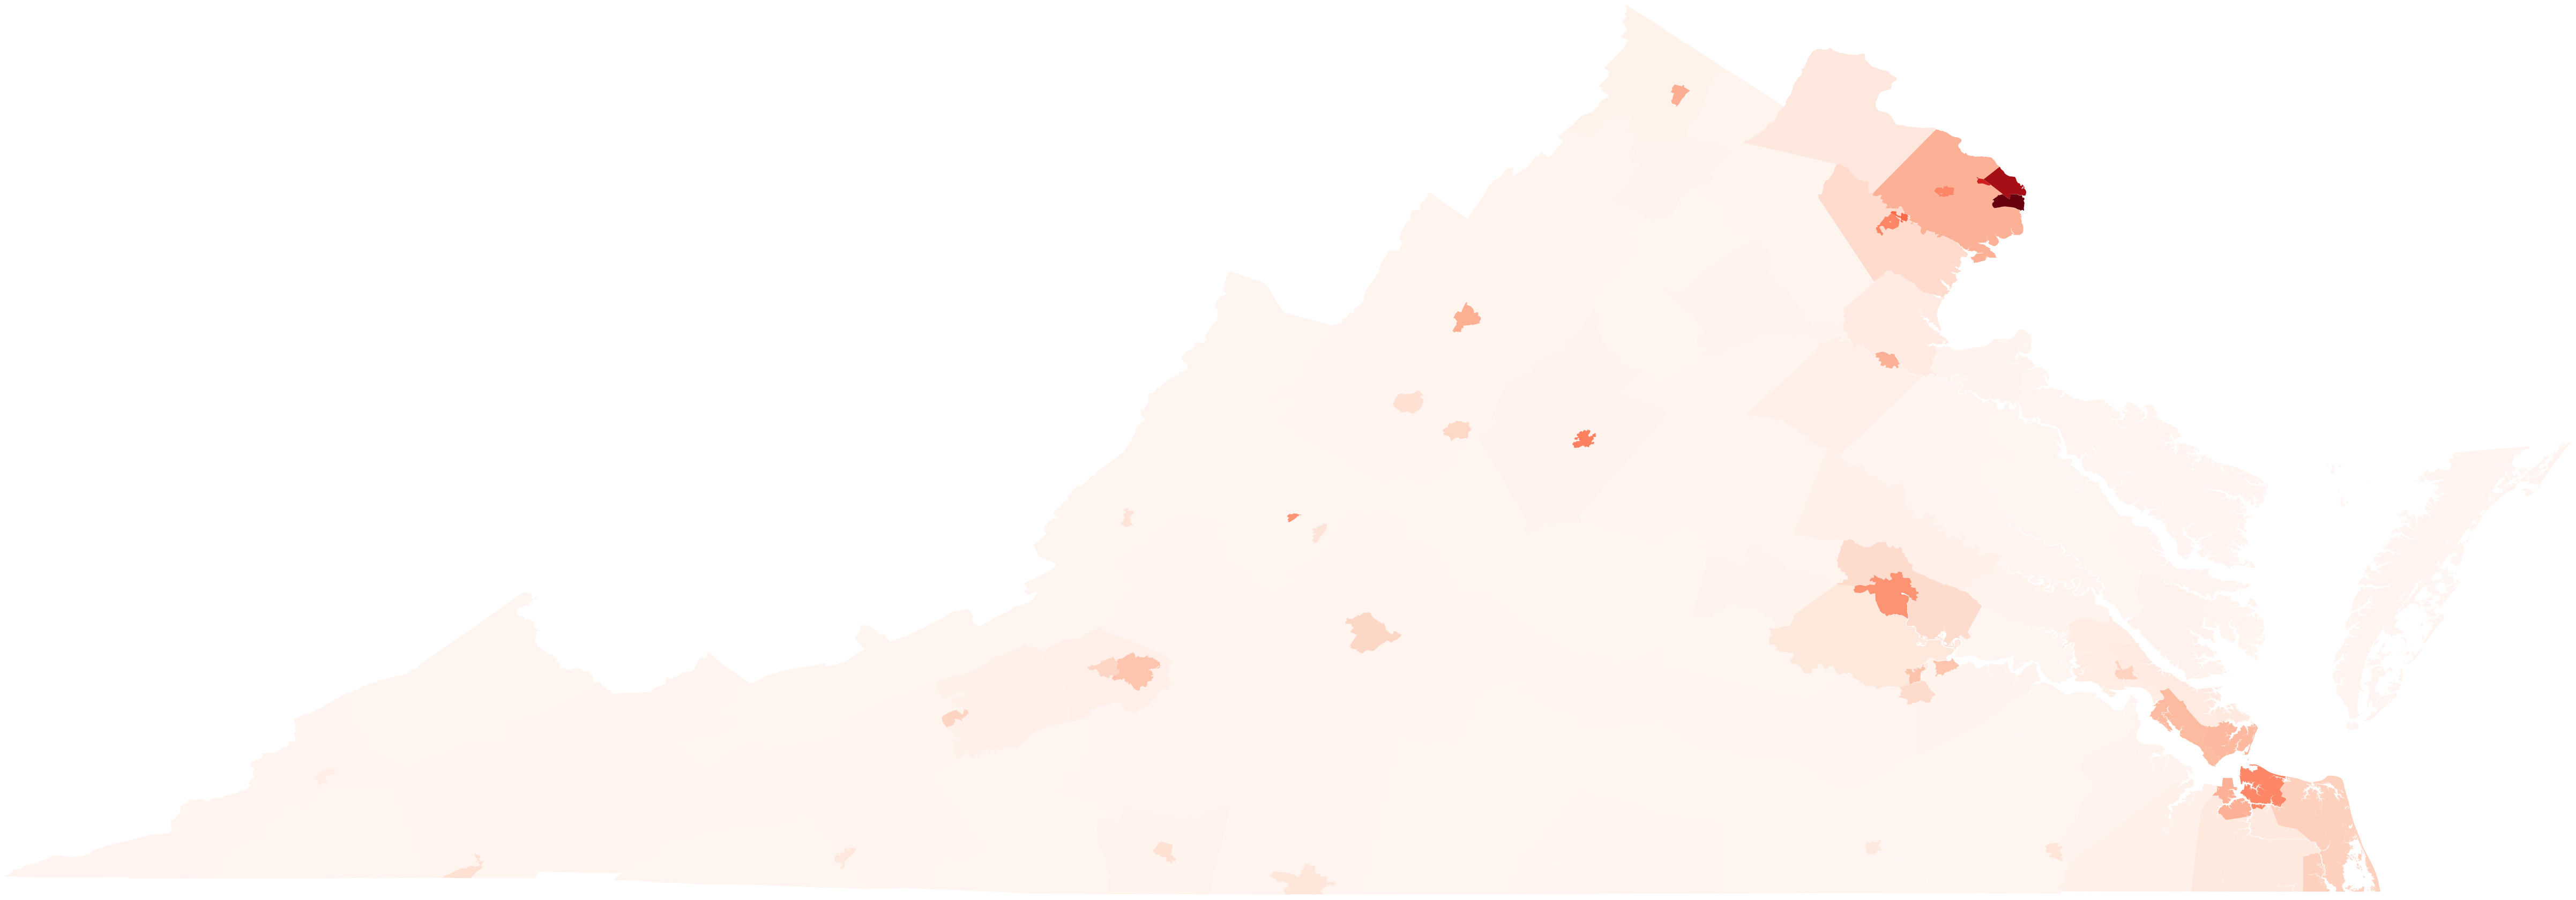

In [10]:
fig, ax = plt.subplots(figsize=(62, (6470 / 300)))
merged_gdf.plot(
    column='densityMi',
    cmap='Reds',
    legend=False,
    #edgecolor='black',
    ax=ax
)

ax.axis('off')
xmin, ymin, xmax, ymax = merged_gdf.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)